# Basic Linear Regression Set Up

Suppose we have noisy data of a linear model:

\begin{equation}\label{eq1}\tag{1}
y_{\text{obs}}=4+3x+W
\end{equation}

where $W\sim N(0,1)$ standard normal random variable represents a Gaussian type noise or interference that
keeps us from obtaining the perfect linear output $y(x)=4+3x$. 

The following code snippet generates 100 $x$-axis random values from the interval $[0,2]$ and associates a corresponding $y$-value to each of these 100 $x$-values using relation \eqref{eq1}. We then plot the $(x,y)$ pairs. This corresponds to 100 data points. 


Text(0, 0.5, '$y_{obs}$')

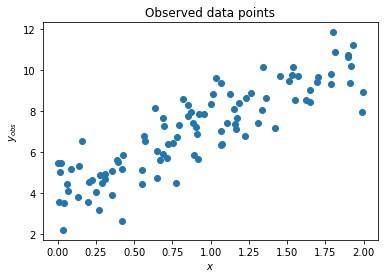

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

plt.scatter(X,y)
plt.title(r'Observed data points')  
plt.xlabel(r'$x$') 
plt.ylabel(r'$y_{obs}$')

We try to illustrate in this toy example how linear regression works by trying to recover the linear model. We assume that the true values satisfy $y_{\text{true}}=\theta_0+\theta_1 x$ for $\theta_0$ the $y$-intercept and $\theta_1$ the slope. This is our working hypothesis. Note if $\theta=[\theta_0,\theta_1]^T$, then 

\begin{equation}
y_{\text{true}}=[\theta_0,\theta_1]
\begin{bmatrix}
1\\
x
\end{bmatrix}
=\theta_0+\theta_1 x
\end{equation}

 

## Some boring details

Remember Python distinguishes between 1-D arrays and 2-D arrays. Remember also the difference between the dimensions of an array in a computer sense that Python uses, versus the concept of dimension of a matrix. An $m$-rows by $n$-columns matrix $(A_{ij})$ is a Python 2-D array of shape $(m,n)$. Note how the independent variable $X$ we generated prints out:

In [2]:
print(X[0:10])

[[0.38473844]
 [1.56967495]
 [1.23390404]
 [0.77117673]
 [0.88265775]
 [0.91233078]
 [0.2042059 ]
 [1.9926047 ]
 [0.63739524]
 [0.72194371]]


# Setting up Normal equation

  

Let us use the commonly used MSE (mean-squared-error) function, defined as

 \begin{equation}
    \text{MSE}(\theta):=\frac{1}{m}\sum_{i=1}^m (\mathbf{\theta}^T \mathbf{x}^{(i)}-y^{(i)})^2
 \end{equation}
 where $\theta$ is a column vector storing the necessary parameters that define the linear model. For our case this column vector $\theta$ is
 
  \begin{equation}
 \theta=[\theta_0, \theta_1]^T
 \end{equation}
 and each observed independent variable $\mathbf{x}^{(i)}$ for our case adds a dummy variable $\mathbf{x}^{(i)}_0:=1$ to obtain the row vector
 
  \begin{equation}\label{eq2}\tag{2}
 \mathbf{x}^{(i)}=[x^{(i)}_0, x^{(i)}_1]=[1, x^{(i)}_1]
 \end{equation} 
 
 where the $\mathbf{x}^{(i)}_0:=1$ fixed dummy value is so we can write a linear regression in this simple form to get 
 \begin{equation}
 y^{(i)}\approx \mathbf{\theta}^T \mathbf{x}^{(i)}=\theta_0+ \theta_1 x^{(i)}_1
 \end{equation}
 
 Note you may have seen the loss function expressed as
 
 \begin{equation}
    J(\theta):=\frac{1}{2}\sum_{i=1}^m (\mathbf{\theta}^T \mathbf{x}^{(i)}-y^{(i)})^2
 \end{equation}
 
 or with some other factor in front of the sum of the squared errors. For the purposes of minimization and using orthogonality relations, this factor is not too relevant as we still have a normal equation relation as we now explain.
 
 **We will use different notation from the class notation $A^T Ax= A^T y$. Here we introduce a slightly different but common notation in machine learning textbooks. We will collect our data into a matrix $X$ (instead of $A$) and solve for a parameter vector $\theta$ (instead of solving for a vector $\mathbf{x}$). This data matrix $X$ is defined by having its $i$th row made of the components of $\mathbf{x}^{(i)}$.** 
 


# Problem 1

 **(A) Note the first code snippet above generated 100 $x$-values and stored them into an array $X$. 
 But to get vectors in the row forms $[1,x_1^{(i)}]$, we need to add 1's to each of the 100 $x$-values generated in the Jupyter cell above. Add 1's first to modify $X$, and print the first 10 entries of your modified $X$ array:** 

In [3]:
#Insert code here

X_b=np.c_[np.ones((100,1)), X]
print(X_b[0:10])

[[1.         0.38473844]
 [1.         1.56967495]
 [1.         1.23390404]
 [1.         0.77117673]
 [1.         0.88265775]
 [1.         0.91233078]
 [1.         0.2042059 ]
 [1.         1.9926047 ]
 [1.         0.63739524]
 [1.         0.72194371]]


**(B) To get the best estimate $\widehat{\theta}$ of our parameters to determine the linear model, we solve the normal equation $X^T X \widehat{\theta}=X^T y$ corresponding to our data points $X$ and $y$: Assuming we have an invertible $X^T X$ we could simply solve**
\begin{equation}
\widehat{\theta}= (X^T X)^{-1} X^T y
\end{equation}

**If the matrix is not invertible, we have to settle for finding solutions to**
\begin{equation}
X^T X\widehat{\theta}=  X^T y
\end{equation}


 **Question: Is it the case that we have an invertible matrix here?** *Note and hint: Assume the 100 obtained $\mathbf{x}^{(i)}$ points are different. Do not just use a built-in determinant Python function to compute the determinant!  
 
 **(C) Code something that can solve the normal equation given above. The function has to solve for the parameter vector $\theta=[\theta_0, \theta_1]^T$. You can use Python built-in functions to solve the normal equation.** Note and Hint: But you cannot use built-in linear regression functions, since we will use those built-in functions below. This question does not require a long code! It can be done very concisely once you have put in the adequate arrays!  
 
 
 
 
 
 
 
 
 
 
 
 
 

In [85]:
#Your code here
 

array([[4.18942558],
       [2.81689747]])

# Problem 2: Plot predictions

What we just did computed the paramenters in $\theta$ using the normal equation corresponding to the data points in $X$ and $y$. Due to the Gaussian noise, it does not capture the exact slope of $\theta_1=3$ and intercept $\theta_0=4$. Nonetheless, we have our model according to the normal equation. So now, if someone gives us $X_{\text{new}}$ particular new inputs to which we want to know the predicted outputs (on which we did not train or calculate the parameter $\widehat{\theta}$). Suppose $X_{\text{new}}$ are two different inputs to which we want to know their predicted values
 

array([[ 3.9397403 ],
       [10.22186412]])

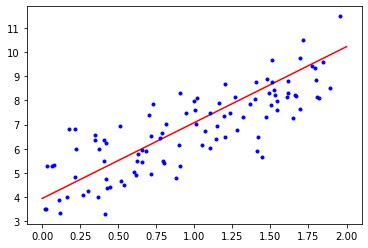

## Scikit-Learn approach (sklearn)
Let us now quickly use a built-in library to perform linear regression this time. 

[3.9397403025422824 3.1410619067263568]


We get the same result using sklearn as solving the normal equation. The skleanr LinearRegression function computes the optimal value $\widehat{\theta}$ using $\widehat{\theta}=X^+ y$ where $X^+$ is the pseudoinverse of $X$. The pseudoinverse $X^+$ in Python is computed using the SVD decomposition. You can actually get the pseudoinverse using np.linalg.pinv() as follows:

[[3.9397403 ]
 [3.14106191]]


 # Gradient Descent Approach
 Let us now use
 \begin{equation}
 \theta^{(i+1)}=\theta^{(i)}-\eta \nabla_{\theta}\text{MSE}(\theta)
 \end{equation}
 
 We use the gradient method to minimize the resulting mean squared error cost function, defined as

 \begin{equation}
    \text{MSE}(\theta):=\frac{1}{m}\sum_{i=1}^m (\mathbf{\theta}^T \mathbf{x}^{(i)}-y^{(i)})^2
 \end{equation}
 where $\theta$ is a column vector storing the necessary parameters that define the linear model. For our case 
 
  \begin{equation}
 \theta=[\theta_0, \theta_1]^T
 \end{equation}
 and each data point for our case is
  \begin{equation}
 \mathbf{x}^{(i)}=[x^{(i)}_0, x^{(i)}_1]=[1, x^{(i)}_1]
 \end{equation}
 
 where the $\mathbf{x}^{(i)}_0:=1$ fixed dummy value is so we can write a linear regression in this simple form to get 
 \begin{equation}
 y^{(i)}\approx \mathbf{\theta}^T \mathbf{x}^{(i)}=\theta_0+ \theta_1 x^{(i)}_1
 \end{equation}
 
 Though in general $d$-dimensions (reprensenting $d$ variables or inputs that we assume characterize a desired output to be predicted, namely, $y^{(i)}=\mathbf{\theta}^T \mathbf{x}^{(i)}$) or $d$ features we have
 \begin{equation}
 \theta=[\theta_0, \theta_1, \theta_2,\cdots , \theta_d]^T\in \mathbb{R}^d
 \end{equation}
 and each data point
  \begin{equation}
 \mathbf{x}^{(i)}=[1, x^{(i)}_1, \cdots , x^{(i)}_d]^T \in \mathbb{R}^d
 \end{equation}
 
 
 ## Gradient of MSE
 
 The gradient of the above function can be expressed elegantly as
 
\begin{align*}
\nabla_{\theta} \text{MSE}=  
\begin{bmatrix}
\frac{\partial}{\partial \theta_0}\text{MSE}(\theta) \\ 
\frac{\partial}{\partial \theta_1}\text{MSE}(\theta) \\ 
\vdots \\ 
\frac{\partial}{\partial \theta_d}\text{MSE}(\theta)
\end{bmatrix}  =\frac{2}{m}X^T(X\theta -y)
\end{align*}
 
 
 The following actually stores all the gradients in an array. We have the directions computed

In [15]:
eta=0.1 #<---learning rate/step size
n_iterations=10000
m=100 #<---number of data points used

theta=np.random.randn(2,1) #<---random initialization of theta/random guess

for iteration in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient

In [16]:
theta #<---get the same as above!

array([[4.06427571],
       [3.27369165]])

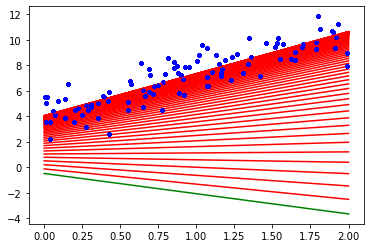

In [18]:
eta=0.02 #<---learning rate/step size
n_iterations=100
m=100 #<---number of data points used

theta=np.random.randn(2,1) #<---random initialization of theta/random guess
  
X_new=np.array([ [0], [2]]) #<---note a column vector of shape (2,1), it is two inputs
X_new_b=np.c_[np.ones((2,1)), X_new] #<--remember we want x_0=1 so the off-set gets included
y_predicted_by_model=np.dot(X_new_b, theta)
plt.plot(X_new, y_predicted_by_model, 'g-')
plt.plot(X,y, 'b.')
 
for iteration in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient
    y_predicted_by_model=np.dot(X_new_b, theta)
    plt.plot(X_new, y_predicted_by_model, 'r-')
    plt.plot(X,y, 'b.')
plt.show()    
    

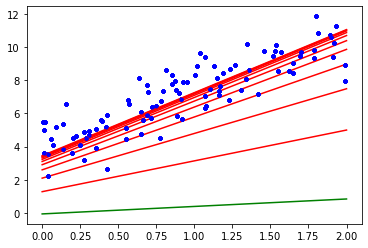

In [19]:
eta=0.1 #<---learning rate/step size
n_iterations=10
m=100 #<---number of data points used

theta=np.random.randn(2,1) #<---random initialization of theta/random guess
  
X_new=np.array([ [0], [2]]) #<---note a column vector of shape (2,1), it is two inputs
X_new_b=np.c_[np.ones((2,1)), X_new] #<--remember we want x_0=1 so the off-set gets included
y_predicted_by_model=np.dot(X_new_b, theta)
plt.plot(X_new, y_predicted_by_model, 'g-')
plt.plot(X,y, 'b.')
 
for iteration in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient
    y_predicted_by_model=np.dot(X_new_b, theta)
    plt.plot(X_new, y_predicted_by_model, 'r-')
    plt.plot(X,y, 'b.')
plt.show()

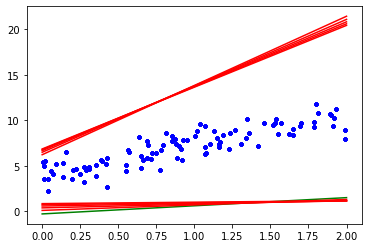

In [24]:
eta=0.5 #<---learning rate/step size
n_iterations=10
m=100 #<---number of data points used

theta=np.random.randn(2,1) #<---random initialization of theta/random guess
  
X_new=np.array([ [0], [2]]) #<---note a column vector of shape (2,1), it is two inputs
X_new_b=np.c_[np.ones((2,1)), X_new] #<--remember we want x_0=1 so the off-set gets included
y_predicted_by_model=np.dot(X_new_b, theta)
plt.plot(X_new, y_predicted_by_model, 'g-')
plt.plot(X,y, 'b.')
 
for iteration in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient
    y_predicted_by_model=np.dot(X_new_b, theta)
    plt.plot(X_new, y_predicted_by_model, 'r-')
    plt.plot(X,y, 'b.')
plt.show()

In [23]:
theta

array([[4.04177952],
       [3.24913409]])